In [1]:
#import the neccessary libraries for the app
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D , MaxPooling2D
from tensorflow.keras.utils import to_categorical  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8751 - loss: 0.4265 - val_accuracy: 0.9646 - val_loss: 0.1174
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9687 - loss: 0.1042 - val_accuracy: 0.9671 - val_loss: 0.1040
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9780 - loss: 0.0684 - val_accuracy: 0.9713 - val_loss: 0.0947
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9833 - loss: 0.0506 - val_accuracy: 0.9773 - val_loss: 0.0791
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9873 - loss: 0.0388 - val_accuracy: 0.9748 - val_loss: 0.0796


C:\Users\swath\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9054 - loss: 0.3057 - val_accuracy: 0.9844 - val_loss: 0.0498
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9848 - loss: 0.0492 - val_accuracy: 0.9831 - val_loss: 0.0524
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9899 - loss: 0.0311 - val_accuracy: 0.9888 - val_loss: 0.0359
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9924 - loss: 0.0242 - val_accuracy: 0.9908 - val_loss: 0.0274
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9942 - loss: 0.0176 - val_accuracy: 0.9898 - val_loss: 0.0323
KNN accuracy: 94.52%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


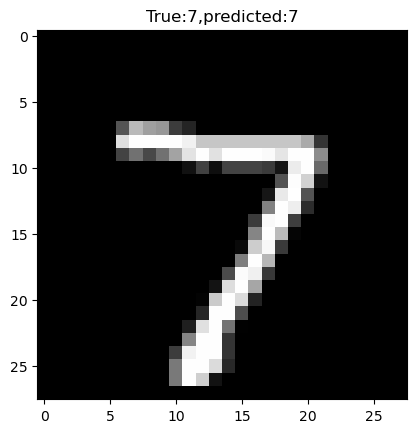

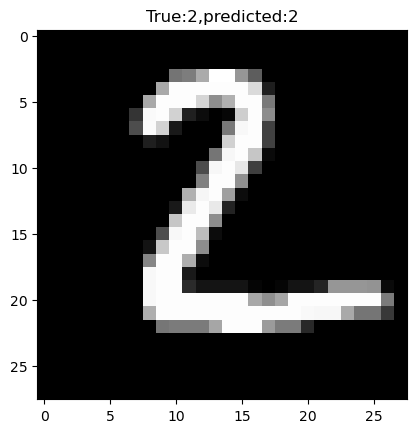

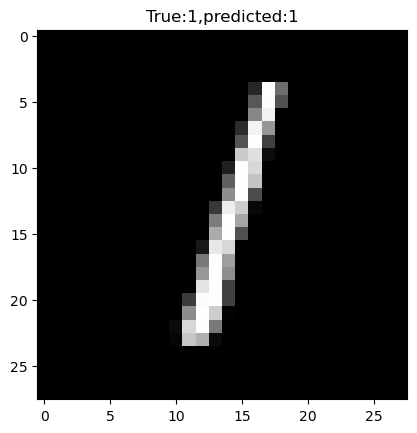

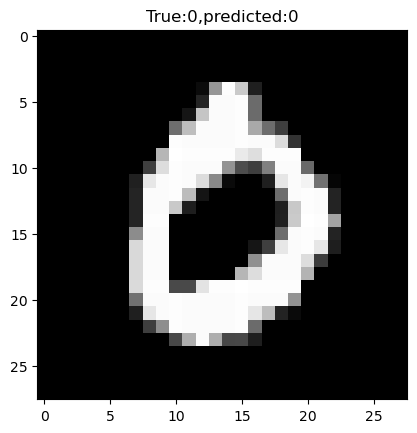

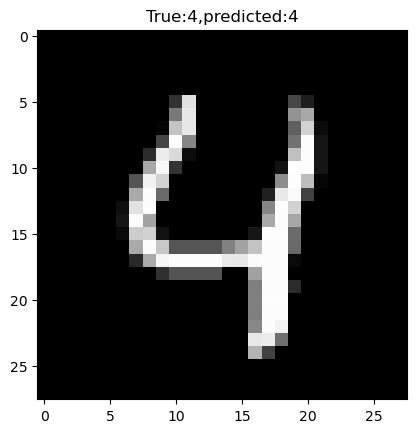

In [10]:
# Import the necessary libraries for the app
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the dataset
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape the data for CNN
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

# One-hot encoding for CNN
y_train_oh = to_categorical(y_train, 10)
y_test_oh = to_categorical(y_test, 10)

# Build an ANN Model
ann_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train ANN model
ann_model.fit(x_train, y_train_oh, epochs=5, batch_size=32, validation_data=(x_test, y_test_oh))

# Build the CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train CNN Model
cnn_model.fit(x_train_cnn, y_train_oh, epochs=5, batch_size=32, validation_data=(x_test_cnn, y_test_oh))

# Build the model with KNN
x_train_knn = x_train.reshape(-1, 28*28)
x_test_knn = x_test.reshape(-1, 28*28)

# Standardization of the data
scaler = StandardScaler()
x_train_knn = scaler.fit_transform(x_train_knn)
x_test_knn = scaler.transform(x_test_knn)

# Create the model
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn_model.fit(x_train_knn, y_train)
knn_accuracy = knn_model.score(x_test_knn, y_test)

print(f"KNN accuracy: {knn_accuracy*100:.2f}%")

#the prediction with CNN
predictions = cnn_model.predict(x_test_cnn)

for i in range(5):
       plt.imshow(x_test[i],cmap='grey')
       plt.title(f"True:{y_test[i]},predicted:{np.argmax(predictions[i])}")
       plt.show()